# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $42924.80
The current value of your 5.3 ETH is $12377.03


In [6]:
my_crypto_value = my_btc_value + my_eth_value
my_crypto_value

55301.826151

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = ('PKL4RBF33XX5FPJZ4BG2')
alpaca_secret_key = ('yP7fmDc30U6BWfyXDMwdcYoPMCVKVNmMEjd5AFVF')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [9]:
# Format current date as ISO format
today = pd.Timestamp('2020-05-01', tz='America/New_York').isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start = today
).df

# Display sample data
df_ticker


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-05-01 04:00:00+00:00,116.97,117.0998,116.6775,116.87,6099551,24394,116.846121,AGG
2020-05-04 04:00:00+00:00,116.89,117.0900,116.8700,116.97,3684081,15545,116.960599,AGG
2020-05-05 04:00:00+00:00,116.96,116.9700,116.8100,116.88,4611519,15146,116.879640,AGG
2020-05-06 04:00:00+00:00,116.44,116.7100,116.3000,116.41,6394949,20233,116.426742,AGG
2020-05-07 04:00:00+00:00,116.61,116.7700,116.4200,116.77,3786651,15963,116.641826,AGG
...,...,...,...,...,...,...,...,...
2023-06-12 04:00:00+00:00,430.92,433.8800,430.1700,433.80,76272808,523670,431.957032,SPY
2023-06-13 04:00:00+00:00,435.32,437.3300,434.6300,436.66,95912772,673273,436.003879,SPY
2023-06-14 04:00:00+00:00,437.01,439.0612,433.5900,437.18,100625477,712664,436.725442,SPY


In [10]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_ticker.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24394  116.846121  285.31  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.73  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15146  116.879640  286.64  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.05  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15963  116.641826  287.75  289.7800  287.1300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.83  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.59   80882213      460681  281.765334  
2020-05-05 04:00:00+00:00  286.15   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.34   73632628      436219  286.096273  
2020-05-07 04:00:00+00:00  287.70   75250412      422688  287.989956

In [11]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
closing_price_AGG = df_ticker["AGG"]["close"][0]
closing_price_AGG

# Access the closing price for SPY from the Alpaca DataFrame
closing_price_SPY = df_ticker["SPY"]["close"][0]
closing_price_SPY





282.83

In [12]:
# Print AGG and SPY close prices
print(closing_price_AGG)
print(closing_price_SPY)

116.87
282.83


In [13]:
# Compute the current value of shares
Current_value_of_shares_AGG = (closing_price_AGG)*(my_agg)
Current_value_of_shares_SPY = (closing_price_SPY)*(my_spy)
print(Current_value_of_shares_AGG)
print(Current_value_of_shares_SPY)




23374.0
14141.5


In [14]:
today_total_stock_bond_value = Current_value_of_shares_AGG + Current_value_of_shares_SPY
print(today_total_stock_bond_value)

37515.5


### Savings Health Analysis

In [15]:
# Set monthly household income
initial_monthly_income = 12000
# YOUR CODE HERE!

# Consolidate financial assets data
today_assets_value = [my_crypto_value,today_total_stock_bond_value]

# YOUR CODE HERE!

# Create savings DataFrame
savings_df = pd.DataFrame(today_assets_value,columns = ["amount"], index = ["crypto","stock_bond"])
# YOUR CODE HERE!

# Display savings DataFrame
display(savings_df)

,amount
crypto,55301.826151
stock_bond,37515.500000


<Axes: ylabel='amount'>

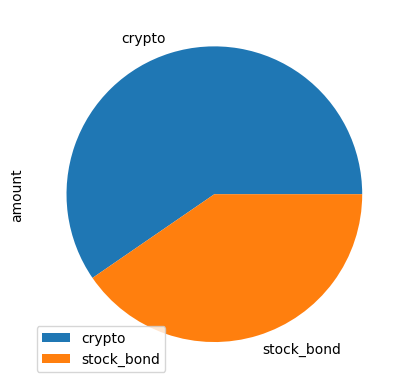

In [16]:
# Plot savings pie chart
savings_df.plot.pie(y='amount')
# YOUR CODE HERE!

In [17]:
today_savings = my_crypto_value + today_total_stock_bond_value
print(today_savings)

92817.326151


In [18]:
# Set ideal emergency fund
emergency_fund = initial_monthly_income * 3
print(emergency_fund) 





# YOUR CODE HERE!

36000


In [19]:
# Calculate total amount of savings
print(today_savings)

92817.326151


In [20]:
# Validate saving health
if today_savings>emergency_fund:
    print('good_financial_health')

good_financial_health


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

# Set the ticker information
tickers = ["AGG","SPY"]



In [22]:
# Get 5 years' worth of historical data for SPY and AGG

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_ticker



,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG
...,...,...,...,...,...,...,...,...
2021-04-26 04:00:00+00:00,417.44,418.2200,416.8111,417.610,51824860,295870,417.508245,SPY
2021-04-27 04:00:00+00:00,417.93,418.1400,416.3000,417.520,50297139,296300,417.481360,SPY
2021-04-28 04:00:00+00:00,417.81,419.0100,416.9000,417.400,50692781,330049,417.742098,SPY


In [23]:
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_ticker.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.8,.2],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998434,0.998866,0.998162,0.998874,0.996138,0.998646,0.999727,0.998749,1.000279,1.005315,...,1.000589,1.008590,0.997988,0.999038,0.995078,1.001451,0.998468,1.002901,0.998564,0.998523
2,0.995112,0.993456,0.998494,0.992404,0.999442,1.001190,1.001009,0.994351,0.999168,1.006912,...,1.001061,1.013398,0.997219,1.000380,0.997763,1.001011,1.004175,1.007612,1.002321,0.999024
3,0.998555,0.993195,0.997437,0.995530,1.001476,1.004658,0.998871,0.996571,0.999466,1.004102,...,1.000343,1.015188,0.994624,0.998338,0.997377,0.997593,1.004551,1.007084,1.003881,0.999631
4,1.000721,0.996850,0.994828,0.994097,0.996640,1.003769,1.005024,0.995323,0.995877,0.998305,...,1.002137,1.014449,0.994977,0.990795,0.997542,0.999462,1.006696,1.012211,1.005796,0.999332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.235968,4.209517,3.516312,3.921232,5.179598,2.204365,4.691736,3.527198,4.189385,3.819130,...,1.639903,3.840270,4.029097,1.613456,2.780829,2.462101,2.535709,3.573019,3.145849,2.445380
7557,4.238534,4.212328,3.497601,3.929904,5.205398,2.216270,4.694037,3.515474,4.185729,3.826848,...,1.644883,3.860193,4.019312,1.622753,2.795121,2.467911,2.549063,3.579944,3.145910,2.440189
7558,4.235575,4.202037,3.500029,3.949295,5.206007,2.218894,4.668894,3.524101,4.187750,3.823617,...,1.645514,3.852979,4.021980,1.623064,2.800645,2.463680,2.555189,3.579636,3.148852,2.431650
7559,4.227800,4.198305,3.520725,3.943166,5.209625,2.229433,4.659118,3.512208,4.200352,3.823450,...,1.649420,3.858146,4.015597,1.627825,2.793917,2.464362,2.569932,3.578723,3.155468,2.427512


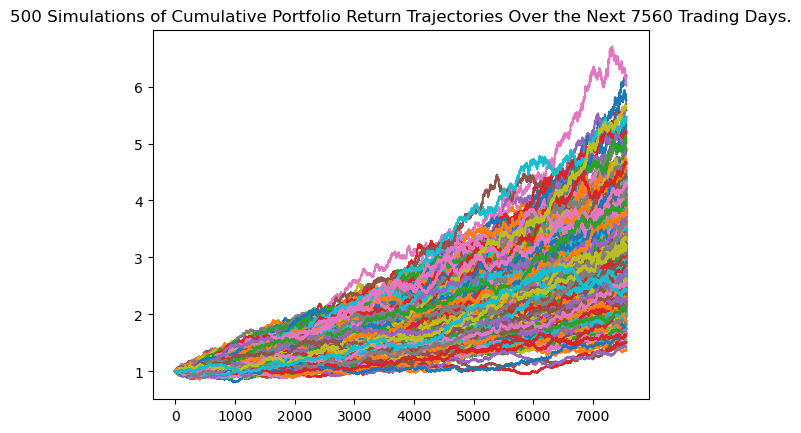

In [26]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()
# YOUR CODE HERE!

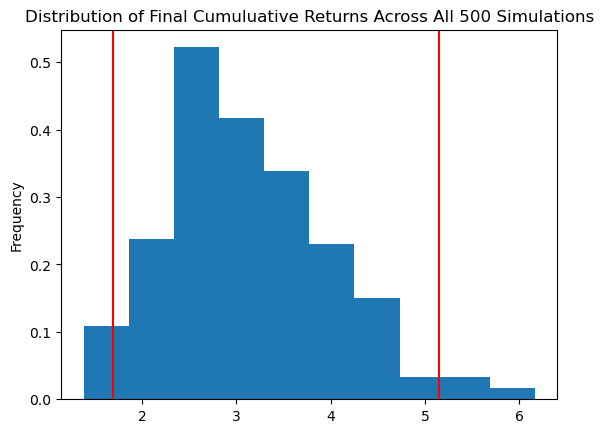

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()
# YOUR CODE HERE!

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.129096
std               0.868607
min               1.380865
25%               2.487453
50%               3.013805
75%               3.656595
max               6.167462
95% CI Lower      1.685847
95% CI Upper      5.147746
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $33716.94 and $102954.92


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $50575.4 and $154432.38


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [33]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [34]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [36]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")